<h1 align="center"> EDA and Data Analysis on IMDB dataset</h1>  



**Note:** *The course project of SDSC2102*   
Group Member:   
*SID: 56641800&emsp; &emsp; Name: Du Junye*  
*SID: 56641885&emsp; &emsp; Name: Wu Jianrui*    
*SID: 56643528&emsp; &emsp; Name: Yang Wentao*    
*SID: 56644501&emsp; &emsp; Name: ZHOU Xin*  



*This project is only for the use of course requirement of sdsc2102*  

<b>Before we Begin:  </b>   
In order to run the code, necessary pckages are required, make sure the following packages have already been installed in your computer: 

+ Basic scientific calculation libraries: Numpy, Pandas, Matplotlib  
+ Advanced Visualization libraies: Seaborn  
+ Packages for machine learning and deep learning: Sklearn, Pytorch(GPU version)  
+ Packages for dynamic graphs: Cufflinks, Plotly
+ Advanced machine learning packages: LightGBM, XGBoost, CatBoost    
+ Model Intepretation tools: shap, eli5 
+ Missing Value processig: missingno, ast 

<b> Introduction to </b>
<b> Our Goals: </b>  
Evaluate the contribution of each selected factor to a movie, predict the revenue of a movie and the overall worldwide box office revenue using LightGBM, XGBoost, CatBoost  


<b> Outline: </b>  

>I. <b>Data pre-processing</b><br>      
>> Detecting and visualizing missing values   
>> Filing missing values with supplymentary data, or with the mean of its columns  
>> Filtering and extracting useful information from the data  
>> Extract key information as categorical features  
>> Formatting the unstandardized dates


>II. <b>Data exploration and visualization</b><br>   
>> Distributions of important numeric features    
>> Relationships between selected important numeric features    
>> Distributions of important categorical features  
>> The correlations between different features  
>> Statistic propertives of features
    
>III. <b>Predixction</b><br> 
>>XGBoost model  
>>LightGBM model  
>>CatBoost model  
>>Feature importance and model intepretation
>> <b><b><br>  
    
>IV.<b>Summary<b><br>  
>> <b>The findings during the process<b><br>
>>



<b> References: </b>
<ul> 
<li>Hands on Machine Learning with Scikit-Learn & TensorFlow by Aurélien Géron (O'Reilly). CopyRight 2017 Aurélien Géron  </li>
<li>Reference Lecture Note of SDSC2102 

In [1]:
#basic scientific libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#classification libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

#dimension reduction packages 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from xgboost import XGBRegressor


#animation and dynamic visualization 
import plotly
import plotly.graph_objects as go
import plotly.express as px              #the ploty function enable us to realize some interacting function in the visualization 
from plotly.offline import iplot,init_notebook_mode
import cufflinks as cf                   #the visualizzation tool 
from scipy import stats                  #the package can be used to apply some basic regression method into application


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
#plotly.offline.iplot()
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=True, world_readable=True)

#missing value handling 
import missingno as msno

import ast
from ast import literal_eval
import eli5
import shap 

from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

## Handling with missing values
**Note:** *In this part, we readin the data downloaded from kaggle and process it so that it could be utilized for further implementation.*

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_extra = pd.read_csv('TrainAdditionalFeatures.csv')
test_extra = pd.read_csv('TestAdditionalFeatures.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

**Note:** *Here we detect and visualize the missing values in the dataset by two bar charts*

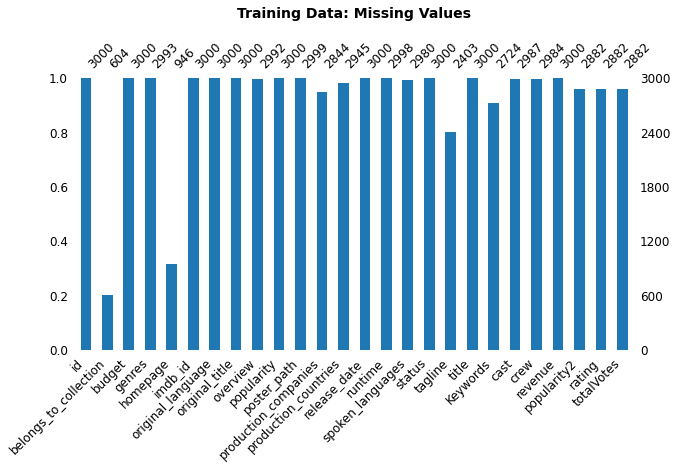

In [3]:
train = pd.merge(train, train_extra, how='left', on=['imdb_id'])
test = pd.merge(test, test_extra, how='left', on=['imdb_id'])
train_miss = msno.bar(train, figsize=(10,5), fontsize=12, color= 'C0')\
    .set_title('Training Data: Missing Values' '\n', fontweight="bold", fontsize=14)

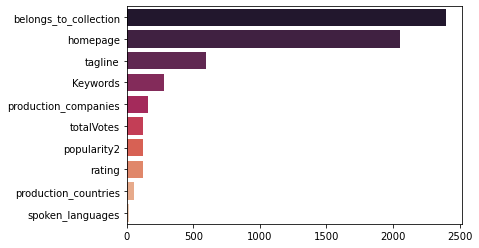

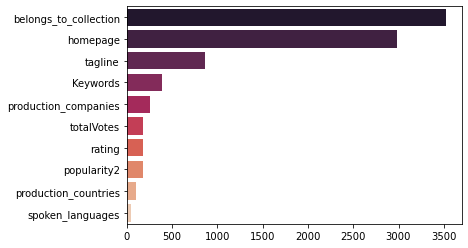

In [4]:
missing_values=train.isna().sum().sort_values(ascending=False)
sns.barplot(missing_values[:10],missing_values[:10].index,palette="rocket")
plt.show()

missing_values1=test.isna().sum().sort_values(ascending=False)
sns.barplot(missing_values1[:10],missing_values1[:10].index,palette="rocket")
plt.show()

**Note:** *Below numeric missing values are filled with the mean of their columns for consistency*

In [5]:
# Addin the release date 05/01/2020, which I found through a quick online search
test.loc[test['release_date'].isnull()==True, 'release_date']= '5/1/00'
test[test["release_date"]== '5/1/00']

train['runtime'] = train['runtime'].fillna(train['runtime'].mean())
test['runtime'] = test['runtime'].fillna(train['runtime'].mean())

train['rating']=train['rating'].fillna(train['rating'].mean())
test['rating']=test['rating'].fillna(test['rating'].mean())

train['totalVotes']=train['totalVotes'].fillna(train['totalVotes'].mean())
train['totalVotes']=train['totalVotes'].round()
test['totalVotes']=test['totalVotes'].fillna(test['totalVotes'].mean())
test['totalVotes']=test['totalVotes'].round()

**Note:** *The remaining missing values are filled with supplemetary reliable information found online to keep the authenticity of our data*

In [6]:
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000


test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 3

## Filter and extract useful information
**Note:** *Here we filter and extract key information of certain columns to form more representative features, unwanted columns are dropped*

In [7]:
train['genres'] = train['genres'].fillna('[]').apply(literal_eval)\
    .apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

test['genres'] = test['genres'].fillna('[]').apply(literal_eval)\
    .apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

train['production_countries'] = train['production_countries'].fillna('[]')\
    .apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
train['production_countries'] = train['production_countries'].apply(lambda x: x[0] if x!= [] else np.nan)

test['production_countries'] = test['production_countries'].fillna('[]')\
    .apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
test['production_countries'] = test['production_countries'].apply(lambda x: x[0] if x!= [] else np.nan)

train['production_companies'] = train['production_companies'].fillna('[]')\
    .apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
train['production_companies'] = train['production_companies'].apply(lambda x: x[0] if x!= [] else np.nan)

test['production_companies'] = test['production_companies'].fillna('[]')\
    .apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
test['production_companies'] = test['production_companies'].apply(lambda x: x[0] if x!= [] else np.nan)

def get_director(list):
    for i in list:
        if i['job'] == 'Director': return i['name']
    return np.nan

train["director"] = train['crew'].fillna('[]').apply(ast.literal_eval).\
                    apply(get_director)
train["actors"] = train['cast'].fillna('[]').apply(ast.literal_eval).\
                    apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else []).\
                    apply(lambda x: x[:3] if len(x) >=5 else x)

test["director"] = train['crew'].fillna('[]').apply(ast.literal_eval).\
                    apply(get_director)
test["actors"] = train['cast'].fillna('[]').apply(ast.literal_eval).\
                    apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else []).\
                    apply(lambda x: x[:3] if len(x) >=5 else x)

train['release_date'] = pd.to_datetime(train['release_date'], format='%m/%d/%y')
test['release_date'] = pd.to_datetime(test['release_date'], format='%m/%d/%y')
train["release_year"] = pd.to_datetime(train["release_date"]).dt.year.astype(int)
train["release_day"] = pd.to_datetime(train["release_date"]).dt.dayofweek.astype(int)
train["release_month"] = pd.to_datetime(train["release_date"]).dt.month.astype(int)
test["release_year"] = pd.to_datetime(test["release_date"]).dt.year.astype(int)
test["release_day"] = pd.to_datetime(test["release_date"]).dt.dayofweek.astype(int)
test["release_month"] = pd.to_datetime(test["release_date"]).dt.month.astype(int)

def get_dictionary(s):
    try: d = eval(s)
    except: d = {}
    return d
train.spoken_languages = train.spoken_languages.map(lambda x: sorted([d['name'] for d in get_dictionary(x)]))\
    .map(lambda x: ','.join(map(str, x)))
test.spoken_languages = train.spoken_languages.map(lambda x: sorted([d['name'] for d in get_dictionary(x)]))\
    .map(lambda x: ','.join(map(str, x)))


train['genres_count'] = train['genres'].apply(lambda x: len(x))
train['spoken_languages_count'] = train['spoken_languages'].str.count(',') + 1

test['genres_count'] = test['genres'].apply(lambda x: len(x))
test['spoken_languages_count'] = test['spoken_languages'].str.count(',') + 1

train = train.drop(['belongs_to_collection','imdb_id','poster_path','cast','crew',\
    'release_date','homepage','overview','tagline','Keywords'],axis =1)
test = test.drop(['belongs_to_collection','imdb_id','poster_path','cast','crew',\
    'release_date','homepage','overview','tagline','Keywords'],axis =1)

In [8]:
train.transpose().iloc[:,:3]

,0,1,2
id,1,2,3
budget,14000000,40000000,3300000
genres,[Comedy],"[Comedy, Drama, Family, Romance]",[Drama]
original_language,en,en,en
original_title,Hot Tub Time Machine 2,The Princess Diaries 2: Royal Engagement,Whiplash
popularity,6.575393,8.248895,64.29999
production_companies,Paramount Pictures,Walt Disney Pictures,Bold Films
production_countries,United States of America,United States of America,United States of America
runtime,93.0,113.0,105.0
spoken_languages,English,English,English


## Formatting unstandardized date 
**Note :** *This dataset is collected in 2019, so there shouldn't be movies released after 2019*

In [9]:
# Fixing the dates
def fix_date(x):
    if x > 2019:
        return x - 100
    else:
        return x 
train['release_year'] = train['release_year'].apply(lambda x: fix_date(x))
test['release_year'] = test['release_year'].apply(lambda x: fix_date(x))
d1 = train['release_year'].value_counts().sort_index()
d2 = test['release_year'].value_counts().sort_index()
data = [go.Scatter(x=d1.index, y=d1.values, name='train'), go.Scatter(x=d2.index, y=d2.values, name='test')]
layout = go.Layout(dict(title = "Number of films per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

## Data exploration and visualization
**Note:** *In this part, we conduct data visualizations on distributions and data propertives as well as the statistic propertives of the dataset. The distributions of selected important features are visualized below*

In [10]:
# choose a few columns to see the distribution

Copydata = train[(train['budget']!= 0) & (train['revenue']!= 0) & (train['runtime']!=0)]
Copydata = Copydata[['budget','revenue','runtime','popularity','totalVotes','rating']]
layout = go.Layout(
    autosize=False,
    width=800,
    height=500,
    xaxis= go.layout.XAxis(linewidth = 1),
    yaxis= go.layout.YAxis(linewidth = 1),
#margin=go.layout.Margin(l=50, r=50,b=100,t=100,pad = 4)
)
Copydata.iplot(kind='hist',              # choose the kind of histogram     
           subplots=True,               # plot a few subplots 
           shape = (2,3),
           horizontal_spacing=.03,       # set the horizontal space 
           fill=True,
           layout = layout,
           shared_yaxes = True,
           subplot_titles=True,        # set the subtitle 
           title='Data Distribution')
# using the Cufflinks package to plot a dynamic chart to visualize the distribution of some variables

**Note:** *Below scatter plot is to explore the relationship between the selected important numeric features*

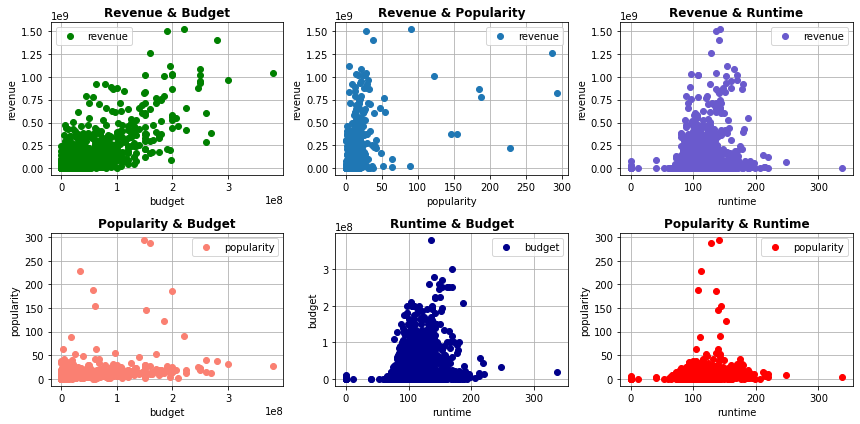

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6), tight_layout=True)

train.plot(ax=ax[0][0], x='budget', y='revenue', style='o', ylabel= 'revenue', color='green').set_title('Revenue & Budget', fontweight="bold")
ax[0][0].grid()
train.plot(ax=ax[0][1], x='popularity', y='revenue', style='o', ylabel= 'revenue').set_title('Revenue & Popularity', fontweight="bold")
ax[0][1].grid()
train.plot(ax=ax[0][2], x='runtime', y='revenue', style='o', ylabel= 'revenue', color='slateblue').set_title('Revenue & Runtime', fontweight="bold")
ax[0][2].grid()
train.plot(ax=ax[1][0], x='budget', y='popularity', style='o', ylabel= 'popularity', color='salmon').set_title('Popularity & Budget', fontweight="bold")
ax[1][0].grid()
train.plot(ax=ax[1][1], x='runtime', y='budget', style='o', ylabel= 'budget', color='DarkBlue').set_title('Runtime & Budget', fontweight="bold")
ax[1][1].grid()
train.plot(ax=ax[1][2], x='runtime', y='popularity', style='o', ylabel= 'popularity', color='red').set_title('Popularity & Runtime', fontweight="bold")
ax[1][2].grid()
fig.tight_layout(pad=4.0)
plt.show()

**Note:** *The correlations between different features are shown by heat map*

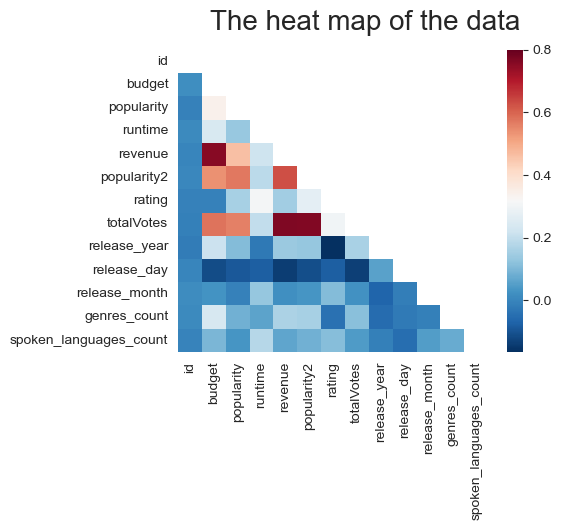

In [12]:
plt.figure(figsize = (5,4),dpi = 100)   # set the canvas 
corr = train.corr()                   # instantiate the correlation matrix
mask =  np.zeros_like(corr, dtype = np.bool)          # set the mask of the heap map 
mask[np.triu_indices_from(mask)] = True 
sns.set_style("whitegrid")                            # set the seaborn style 


sns.heatmap(train.corr(), vmax = .8,  cmap = "RdBu_r", mask=mask);    # the noraml part 
plt.suptitle("The heat map of the data",fontsize = 20)
plt.show()

**Note:** *Below graph shows the change of the four numeric features over the years*

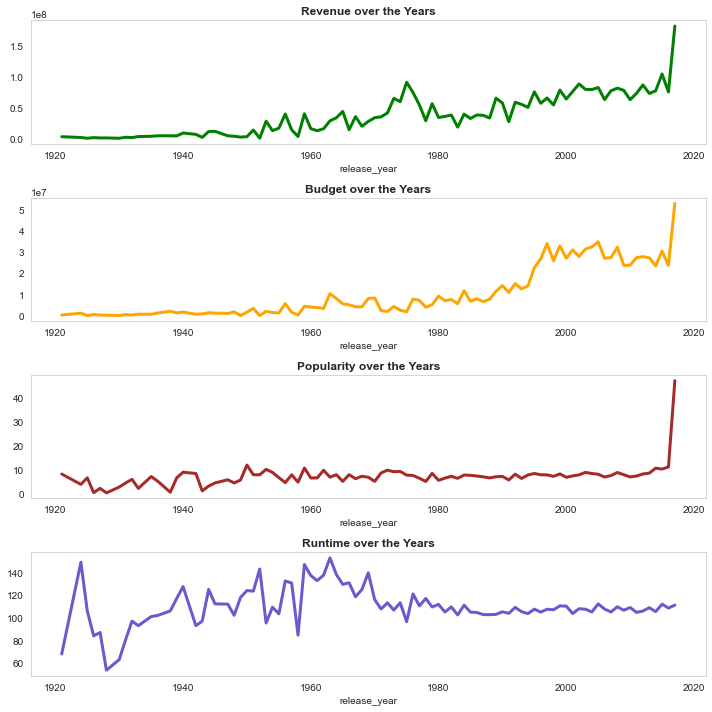

In [13]:
fig, ax = plt.subplots(4, 1, tight_layout=True)
plt.grid()

train.groupby('release_year')['revenue'].mean().plot(ax=ax[0], figsize=(10, 10), linewidth=3, color='green').set_title('Revenue over the Years', fontweight="bold")
ax[0].grid()

train.groupby('release_year')['budget'].mean().plot(ax=ax[1], figsize=(10, 10), linewidth=3, color='orange').set_title('Budget over the Years', fontweight="bold")
ax[1].grid()

train.groupby('release_year')['popularity'].mean().plot(ax=ax[2], figsize=(10, 10), linewidth=3, color='brown').set_title('Popularity over the Years', fontweight="bold")
ax[2].grid()

train.groupby('release_year')['runtime'].mean().plot(ax=ax[3], figsize=(10, 10), linewidth=3, color='slateblue').set_title('Runtime over the Years', fontweight="bold")
ax[3].grid()

fig.tight_layout(pad=2.0)
plt.show()

**Note:** *We select languages and genres as representatives of categorical features. By box plot, we get the distributions of different languages and their data quartiles*

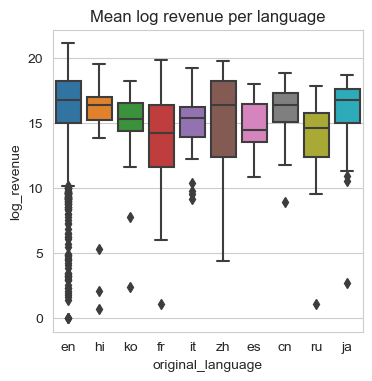

In [14]:
import copy 
trainplot = copy.deepcopy(train)
trainplot['log_revenue'] = np.log(trainplot['revenue'])
plt.figure(figsize=(4, 4),dpi=100)

sns.boxplot(x='original_language', y='log_revenue', data=trainplot.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)]);
plt.title('Mean log revenue per language');

**Note:** *For genres, we first display the count of different types of movies and then manage to visualize movies' mean revenue of the top 4 types of genres thourh dynamic line chart*

<Figure size 720x432 with 0 Axes>

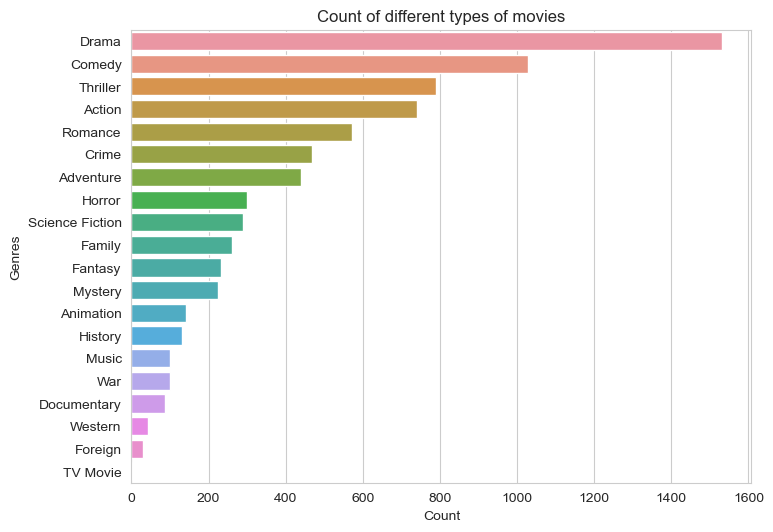

In [15]:
train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()
list_of_genres = list(train['genres'].apply(lambda x: [i for i in x] if x != {} else []).values)
most_common_genres=Counter([i for j in list_of_genres for i in j]).most_common()
fig = plt.figure(figsize=(10, 6))
data=dict(most_common_genres)
names = list(data.keys())
values = list(data.values())
plt.figure(figsize = (8,6),dpi = 100)

sns.barplot(x = values, y = names ,orient = 'h')
plt.title("Count of different types of movies")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.show()

In [16]:
s = train.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'classfy'
genres = train.join(s)
combine = genres.groupby(by = ["classfy",'release_year']).agg({'revenue':'mean'})

In [17]:
title = 'Top 4 movies\'revenue over the years'
labels = ['Drama', 'Comedy','Thriller','Action']
colors = ['rgb(67,67,67)', 'rgb(115,115,115)', 'rgb(49,130,189)', 'rgb(189,189,189)']
mode_size = [12, 10, 12, 10]
line_size = [2, 2, 4, 2]
x_data = np.vstack((np.arange(2005, 2017),)*4)
y_data = np.array([
    combine.loc['Drama'].iloc[-15:-3].values.flatten()/1000000,
    combine.loc['Comedy'].iloc[-15:-3].values.flatten()/1000000,
    combine.loc['Thriller'].iloc[-15:-3].values.flatten()/1000000,
    combine.loc['Action'].iloc[-15:-3].values.flatten()/1000000])
fig = go.Figure()
for i in range(0, 4):
    fig.add_trace(go.Scatter(x=x_data[i], y=y_data[i], mode='lines',
        name=labels[i],line=dict(color=colors[i], width=line_size[i]),connectgaps=True,))
    fig.add_trace(go.Scatter(
        x=[x_data[i][0], x_data[i][-1]],y=[y_data[i][0], y_data[i][-1]],
        mode='markers',marker=dict(color=colors[i], size=mode_size[i])))
fig.update_layout(
    xaxis=dict(showline=True,showgrid=False,showticklabels=True,linecolor='rgb(204, 204, 204)',linewidth=2,
        ticks='outside',tickfont=dict(family='Arial',size=12,color='rgb(82, 82, 82)',),),
    yaxis=dict(showgrid=False,zeroline=False,showline=False,showticklabels=False,),
    autosize=False,margin=dict(autoexpand=False,l=100,r=20,t=110,),showlegend=False,plot_bgcolor='white')
annotations = []
for y_trace, label, color in zip(y_data, labels, colors):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=label,
                                  font=dict(family='Arial',size=16),showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[11],
                                  xanchor='left', yanchor='middle',
                                  text='{}M'.format(y_trace[11].round(1)),
                                  font=dict(family='Arial',size=12),showarrow= False))
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Movies\' revenue of top 4 genres over the years',
                              font=dict(family='Arial',size=25,color='rgb(37,37,37)'),showarrow=False))
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Source: Moives DataSet from CC0: Public Domain',
                              font=dict(family='Arial',size=12,color='rgb(150,150,150)'),showarrow=False))
fig.update_layout(annotations=annotations)
fig.show()

# Data processing for the model implementation

In [18]:
train.head()

,id,budget,genres,original_language,original_title,popularity,production_companies,production_countries,runtime,spoken_languages,status,title,revenue,popularity2,rating,totalVotes,director,actors,release_year,release_day,release_month,genres_count,spoken_languages_count
0,1,14000000,[Comedy],en,Hot Tub Time Machine 2,6.575393,Paramount Pictures,United States of America,93.0,English,Released,Hot Tub Time Machine 2,12314651,10.400,5.000000,482.0,Steve Pink,"[Rob Corddry, Craig Robinson, Clark Duke]",2015,4,2,1,1
1,2,40000000,"[Comedy, Drama, Family, Romance]",en,The Princess Diaries 2: Royal Engagement,8.248895,Walt Disney Pictures,United States of America,113.0,English,Released,The Princess Diaries 2: Royal Engagement,95149435,15.229,6.400000,1528.0,Garry Marshall,"[Anne Hathaway, Julie Andrews, H√©ctor Elizondo]",2004,4,8,4,1
2,3,3300000,[Drama],en,Whiplash,64.299990,Bold Films,United States of America,105.0,English,Released,Whiplash,13092000,26.082,8.400000,7314.0,Damien Chazelle,"[Miles Teller, J.K. Simmons, Melissa Benoist]",2014,4,10,1,1
3,4,1200000,"[Thriller, Drama]",hi,Kahaani,3.174936,NaN,India,122.0,"English,हिन्दी",Released,Kahaani,16000000,5.531,7.500000,115.0,Sujoy Ghosh,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",2012,4,3,2,2
4,5,0,"[Action, Thriller]",ko,마린보이,1.148070,NaN,South Korea,118.0,한국어/조선말,Released,Marine Boy,3923970,NaN,6.366308,934.0,Jong-seok Yoon,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",2009,3,2,2,1


**Note:** *Cleaning missing values; dealing with categorical features.*

In [19]:
a=train.isna().sum()
print(a[a>0])
b=test.isna().sum()
print(b[b>0])

production_companies    156
production_countries     55
popularity2             118
director                 16
dtype: int64
production_companies       258
production_countries       102
spoken_languages          1398
status                       2
title                        3
popularity2                179
director                  1414
actors                    1398
spoken_languages_count    1398
dtype: int64


In [20]:
train["production_companies"].fillna("none",inplace=True)
train["production_countries"].fillna("none",inplace=True)
test["production_companies"].fillna("none",inplace=True)
test["production_countries"].fillna("none",inplace=True)

train.dropna(inplace=True)
test.dropna(inplace=True)

def flatten(t):
    return [item for sublist in t for item in sublist]

all_actors=pd.Series(flatten(train["actors"].to_list()))
c=all_actors.value_counts()
c=c[c>13]
for i, j in zip(range(len(c)),c.index):
    train[f"{i}_actors"]=j in train["actors"]
    test[f"{i}_actors"]=j in test["actors"]
train.drop(columns="actors",inplace=True)
test.drop(columns="actors",inplace=True)

all_values = set(flatten(train["genres"].to_list()))
for i in all_values:
    train[f"{i}_genres"]=i in train["genres"]
    test[f"{i}_genres"]=i in test["genres"]
train.drop(columns="genres",inplace=True)
test.drop(columns="genres",inplace=True)

In [21]:
all_companies=pd.Series(train["production_companies"].to_list())
d=all_companies.value_counts()
d=d[d>7]
for i, j in zip(range(len(d)),d.index):
    train[f"{i}_companies"]=j in train["production_companies"]
    test[f"{i}_companies"]=j in test["production_companies"]
train.drop(columns="production_companies",inplace=True)
test.drop(columns="production_companies",inplace=True)

all_lang=pd.Series(train["spoken_languages"].to_list())
e=all_lang.value_counts()
e=e[e>5]
for i, j in zip(range(len(e)),e.index):
    train[f"{i}_lang"]=j in train["spoken_languages"]
    test[f"{i}_lang"]=j in test["spoken_languages"]
train.drop(columns="spoken_languages",inplace=True)
test.drop(columns="spoken_languages",inplace=True)

all_director=pd.Series(train["director"].to_list())
f=all_director.value_counts()
f=f[f>6]
for i, j in zip(range(len(f)),f.index):
    train[f"{i}_director"]=j in train["director"]
    test[f"{i}_director"]=j in test["director"]
train.drop(columns="director",inplace=True)
test.drop(columns="director",inplace=True)

all_countries=pd.Series(train["production_countries"].to_list())
g=all_countries.value_counts()
g=g[g>4]
for i, j in zip(range(len(g)),g.index):
    train[f"{i}_countries"]=j in train["production_countries"]
    test[f"{i}_countries"]=j in test["production_countries"]
train.drop(columns="production_countries",inplace=True)
test.drop(columns="production_countries",inplace=True)

In [22]:
cat_vars=["original_language", "status"]
ohe=OneHotEncoder(drop="first", handle_unknown="ignore")
for i in cat_vars:
    print(i,len(train[i].unique()))
ohe.fit(train[cat_vars])
ohe1=pd.DataFrame(ohe.transform(train[cat_vars]).toarray(),columns=ohe.get_feature_names_out())
ohe2=pd.DataFrame(ohe.transform(test[cat_vars]).toarray(),columns=ohe.get_feature_names_out())
train=pd.concat([train.reset_index(),ohe1],axis=1)
test=pd.concat([test.reset_index(),ohe2],axis=1)
for i in cat_vars:
    train.drop(columns=i,inplace=True)
    test.drop(columns=i,inplace=True)

original_language 36
status 2


**Note:** *Final preparations.*

In [23]:
train['revenue'] = np.log1p(train['revenue'])
y = train['revenue'].values

train.drop(columns=["original_title","title","revenue"],inplace=True)
test.drop(columns=["original_title","title"],inplace=True)

train.head()

,index,id,budget,popularity,runtime,popularity2,rating,totalVotes,release_year,release_day,release_month,genres_count,spoken_languages_count,0_actors,1_actors,2_actors,3_actors,4_actors,5_actors,6_actors,7_actors,8_actors,9_actors,10_actors,11_actors,12_actors,13_actors,14_actors,15_actors,16_actors,17_actors,18_actors,19_actors,20_actors,21_actors,22_actors,23_actors,24_actors,25_actors,26_actors,27_actors,28_actors,Adventure_genres,Action_genres,Drama_genres,Documentary_genres,Thriller_genres,Comedy_genres,TV Movie_genres,Foreign_genres,Family_genres,Music_genres,Mystery_genres,Horror_genres,Animation_genres,Fantasy_genres,Crime_genres,Science Fiction_genres,History_genres,Romance_genres,War_genres,Western_genres,0_companies,1_companies,2_companies,3_companies,4_companies,5_companies,6_companies,7_companies,8_companies,9_companies,10_companies,11_companies,12_companies,13_companies,14_companies,15_companies,16_companies,17_companies,18_companies,19_companies,20_companies,21_companies,22_companies,23_companies,24_companies,25_companies,26_companies,27_companies,28_companies,29_companies,30_companies,31_companies,32_companies,33_companies,34_companies,35_companies,36_companies,37_companies,38_companies,39_companies,40_companies,41_companies,42_companies,43_companies,0_lang,1_lang,2_lang,3_lang,4_lang,5_lang,6_lang,7_lang,8_lang,9_lang,10_lang,11_lang,12_lang,13_lang,14_lang,15_lang,16_lang,17_lang,18_lang,19_lang,20_lang,21_lang,22_lang,23_lang,24_lang,25_lang,26_lang,27_lang,28_lang,29_lang,30_lang,31_lang,32_lang,33_lang,34_lang,35_lang,36_lang,37_lang,0_director,1_director,2_director,3_director,4_director,5_director,6_director,7_director,8_director,9_director,10_director,11_director,12_director,13_director,14_director,15_director,16_director,17_director,18_director,19_director,20_director,21_director,0_countries,1_countries,2_countries,3_countries,4_countries,5_countries,6_countries,7_countries,8_countries,9_countries,10_countries,11_countries,12_countries,13_countries,14_countries,15_countries,16_countries,17_countries,18_countries,19_countries,20_countries,21_countries,22_countries,23_countries,24_countries,25_countries,26_countries,27_countries,original_language_bn,original_language_cn,original_language_cs,original_language_da,original_language_de,original_language_el,original_language_en,original_language_es,original_language_fa,original_language_fi,original_language_fr,original_language_he,original_language_hi,original_language_hu,original_language_id,original_language_it,original_language_ja,original_language_ko,original_language_ml,original_language_mr,original_language_nb,original_language_nl,original_language_no,original_language_pl,original_language_pt,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_tr,original_language_ur,original_language_vi,original_language_zh,status_Rumored
0,0,1,14000000,6.575393,93.0,10.400,5.0,482.0,2015,4,2,1,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [24]:
random_seed = 2019
k = 10
fold = list(KFold(k, shuffle = True, random_state = random_seed).split(train))
np.random.seed(random_seed)

In [25]:
import xgboost as xgb

def xgb_model(trn_x, trn_y, val_x, val_y) :
    
    params = {'objective': 'reg:linear', 
              'eta': 0.01, 
              'max_depth': 6, 
              'subsample': 0.6, 
              'colsample_bytree': 0.7,  
              'eval_metric': 'rmse', 
              'seed': random_seed, 
              'verbosity': 0,
    }
    
    record = dict()
    model = xgb.train(params
                      , xgb.DMatrix(trn_x, trn_y)
                      , 100000
                      , [(xgb.DMatrix(trn_x, trn_y), 'train'), (xgb.DMatrix(val_x, val_y), 'valid')]
                      , verbose_eval=False
                      , early_stopping_rounds=500
                      , callbacks = [xgb.callback.record_evaluation(record)])
    best_idx = np.argmin(np.array(record['valid']['rmse']))

    return record['valid']['rmse'][best_idx]


import lightgbm as lgb

def lgb_model(trn_x, trn_y, val_x, val_y) :

    params = {'objective':'regression',
         'num_leaves' : 30,
         'min_data_in_leaf' : 20,
         'max_depth' : 9,
         'learning_rate': 0.004,
         'feature_fraction':0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         'lambda_l1': 0.2,
         "bagging_seed": random_seed,
         "metric": 'rmse',
         "random_state" : random_seed,
         "verbosity": -1}

    record = dict()
    model = lgb.train(params
                      , lgb.Dataset(trn_x, trn_y)
                      , num_boost_round = 100000
                      , valid_sets = [lgb.Dataset(val_x, val_y)]
                      , verbose_eval = False
                      , early_stopping_rounds = 500
                      , callbacks = [lgb.record_evaluation(record)]
                     )
    best_idx = np.argmin(np.array(record['valid_0']['rmse']))
    
    return record['valid_0']['rmse'][best_idx]


from catboost import CatBoostRegressor

def cat_model(trn_x, trn_y, val_x, val_y) :
    
    model = CatBoostRegressor(iterations=100000,
                                 learning_rate=0.004,
                                 depth=5,
                                 eval_metric='RMSE',
                                 colsample_bylevel=0.8,
                                 random_seed = random_seed,
                                 bagging_temperature = 0.2,
                                 metric_period = None,
                                 early_stopping_rounds=200
                                )
    model.fit(trn_x, trn_y,
                 eval_set=(val_x, val_y),
                 verbose=False)
    
    return model.best_score_['validation']['RMSE']

In [26]:
all1=[]
all2=[]

for i, (trn, val) in enumerate(fold) :
    trn_x = train.loc[trn, :]
    trn_y = y[trn]
    val_x = train.loc[val, :]
    val_y = y[val]
    
    this_fold1=[]
    this_fold2=[]
    
    # xgboost
    start = datetime.now()
    result = xgb_model(trn_x, trn_y, val_x, val_y)
    delta=(datetime.now()-start)
    this_fold1+=[result]
    this_fold2+=[delta.microseconds/1000000+delta.seconds]
    
    # lightgbm
    start = datetime.now()
    result = lgb_model(trn_x, trn_y, val_x, val_y)
    delta=(datetime.now()-start)
    this_fold1+=[result]
    this_fold2+=[delta.microseconds/1000000+delta.seconds]
    
    # catboost model
    start = datetime.now()
    result = cat_model(trn_x, trn_y, val_x, val_y)
    delta=(datetime.now()-start)
    this_fold1+=[result]
    this_fold2+=[delta.microseconds/1000000+delta.seconds]
    
    all1.append(this_fold1)
    all2.append(this_fold2)
    
data1=pd.DataFrame(all1,columns=["XGBoost", "LightGBM", "CatBoost"])
data2=pd.DataFrame(all2,columns=["XGBoost", "LightGBM", "CatBoost"])


**Note:** *RMSE.*

In [27]:
data1

,XGBoost,LightGBM,CatBoost
0,1.816272,1.841695,1.756717
1,1.563851,1.481661,1.497488
2,1.834872,1.887585,1.803972
3,1.703213,1.720395,1.654958
4,1.573569,1.612547,1.514082
5,1.968017,2.040472,1.936038
6,1.868848,1.917093,1.839757
7,2.051641,2.130824,2.015293
8,1.546825,1.575951,1.502042
9,1.916011,1.941070,1.823022


In [28]:
stat1=data1.mean()
stat1

XGBoost     1.784312
LightGBM    1.814929
CatBoost    1.734337
dtype: float64

<AxesSubplot:>

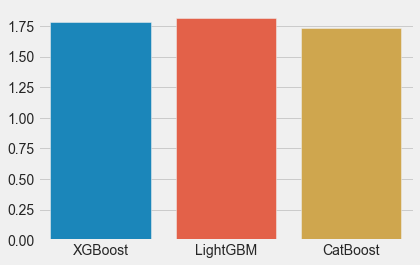

In [29]:
plt.style.use('fivethirtyeight')
sns.barplot(stat1.index, stat1.values)

**Note:** *Fit time (s).*

In [30]:
data2

,XGBoost,LightGBM,CatBoost
0,6.815399,2.805549,33.643538
1,6.042457,2.129431,38.385441
2,6.084245,1.875373,49.242137
3,8.249690,1.655322,53.066816
4,6.328280,2.310462,55.988651
5,5.564129,1.616329,54.676199
6,6.052236,2.728547,44.652369
7,5.261052,1.852376,51.435625
8,5.459104,1.780354,48.831607
9,6.052235,2.847565,51.526887


In [31]:
stat2=data2.mean()
stat2

XGBoost      6.190883
LightGBM     2.160131
CatBoost    48.144927
dtype: float64

<AxesSubplot:>

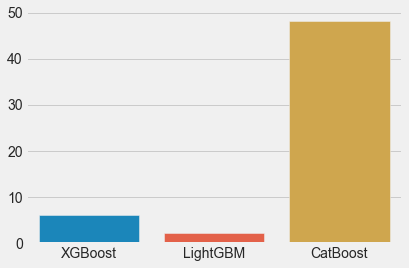

In [32]:
sns.barplot(stat2.index, stat2.values)

# LightGBM intepretation 

**Note:** *Drawing the figures used in the slides. Detailed interpretation can be found there.*

[1]	training's rmse: 2.87329	valid_1's rmse: 3.03438
[2]	training's rmse: 2.86667	valid_1's rmse: 3.02869
[3]	training's rmse: 2.85978	valid_1's rmse: 3.02234
[4]	training's rmse: 2.85344	valid_1's rmse: 3.01665
[5]	training's rmse: 2.84744	valid_1's rmse: 3.01153
[6]	training's rmse: 2.84134	valid_1's rmse: 3.0065
[7]	training's rmse: 2.83488	valid_1's rmse: 3.00062
[8]	training's rmse: 2.82848	valid_1's rmse: 2.99495
[9]	training's rmse: 2.82209	valid_1's rmse: 2.98908
[10]	training's rmse: 2.81598	valid_1's rmse: 2.98364
[11]	training's rmse: 2.81007	valid_1's rmse: 2.97797
[12]	training's rmse: 2.80384	valid_1's rmse: 2.9727
[13]	training's rmse: 2.7974	valid_1's rmse: 2.96619
[14]	training's rmse: 2.79146	valid_1's rmse: 2.96093
[15]	training's rmse: 2.78496	valid_1's rmse: 2.95496
[16]	training's rmse: 2.77904	valid_1's rmse: 2.94963
[17]	training's rmse: 2.7732	valid_1's rmse: 2.94422
[18]	training's rmse: 2.76706	valid_1's rmse: 2.93933
[19]	training's rmse: 2.76093	valid_1's r

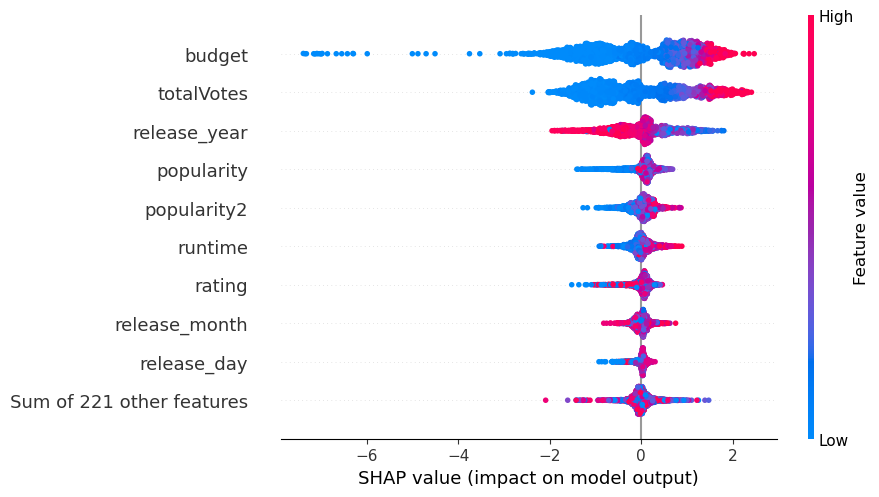

In [33]:
plt.style.use('default')

params = {'objective':'regression',
          "num_boost_round":100000,
         'num_leaves' : 30,
         'min_data_in_leaf' : 20,
         'max_depth' : 9,
         'learning_rate': 0.004,
         'feature_fraction':0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         'lambda_l1': 0.2,
         "bagging_seed": random_seed,
         "metric": 'rmse',
         "random_state" : random_seed,
         "verbosity": -1}
model233 = lgb.LGBMRegressor(**params)
model233.fit(trn_x, trn_y,
        eval_set=[(trn_x, trn_y), (val_x, val_y)], early_stopping_rounds = 500)

explainer = shap.TreeExplainer(model233)
shap_values = explainer(trn_x)
shap.plots.beeswarm(shap_values)

In [34]:
eli5.show_weights(model233, feature_filter=lambda x: x != '<BIAS>')

Weight,Feature
0.3832,budget
0.1749,totalVotes
0.1029,release_year
0.0690,popularity
0.0643,popularity2
0.0492,runtime
0.0459,rating
0.0327,index
0.0249,release_month
0.0183,release_day


In [35]:
X_train = trn_x.astype(int)
y_train = trn_y.astype(int)
X_valid = val_x.astype(int)
y_valid = val_y.astype(int)
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 6,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
model1 = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
model1.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=200)


[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[1000]	training's rmse: 1.21433	valid_1's rmse: 1.95941


LGBMRegressor(bagging_fraction=0.9, bagging_freq=1, bagging_seed=11,
              boosting='gbdt', feature_fraction=0.9, lambda_l1=0.2,
              learning_rate=0.01, max_depth=6, metric='rmse',
              min_data_in_leaf=20, n_estimators=20000, nthread=4, num_leaves=30,
              objective='regression', verbosity=-1)

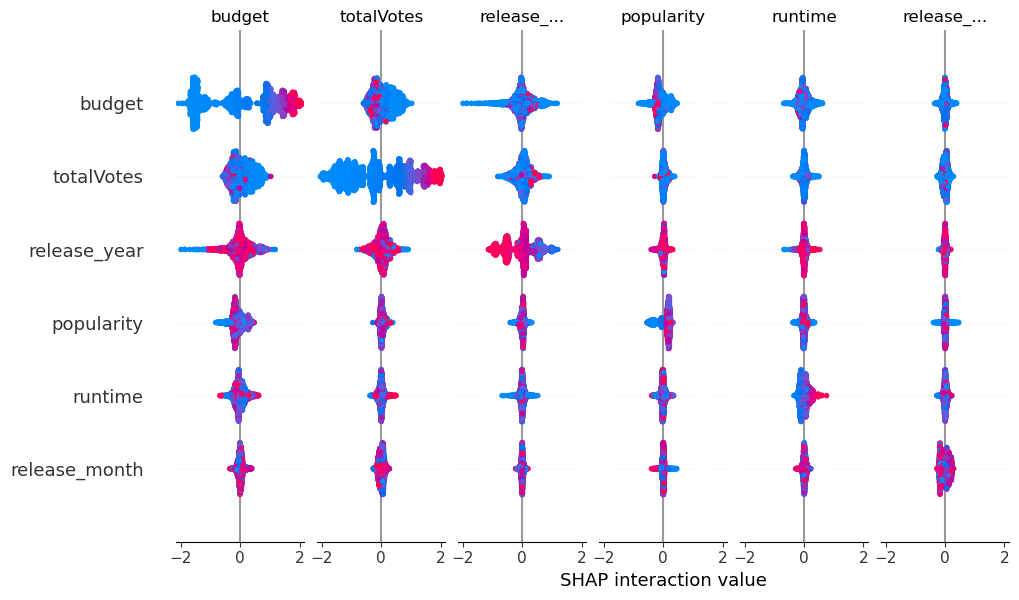

In [36]:
shap_interaction_values = shap.TreeExplainer(model1).shap_interaction_values(X_train)
shap.summary_plot(shap_interaction_values, X_train, max_display=6)

In [37]:
# visualize all the training set predictions

shap.initjs()
explainer = shap.TreeExplainer(model1)
shap_values = explainer(X_train)
shap.plots.force(explainer.expected_value,shap_values.values[:100],shap_values.data[:100])

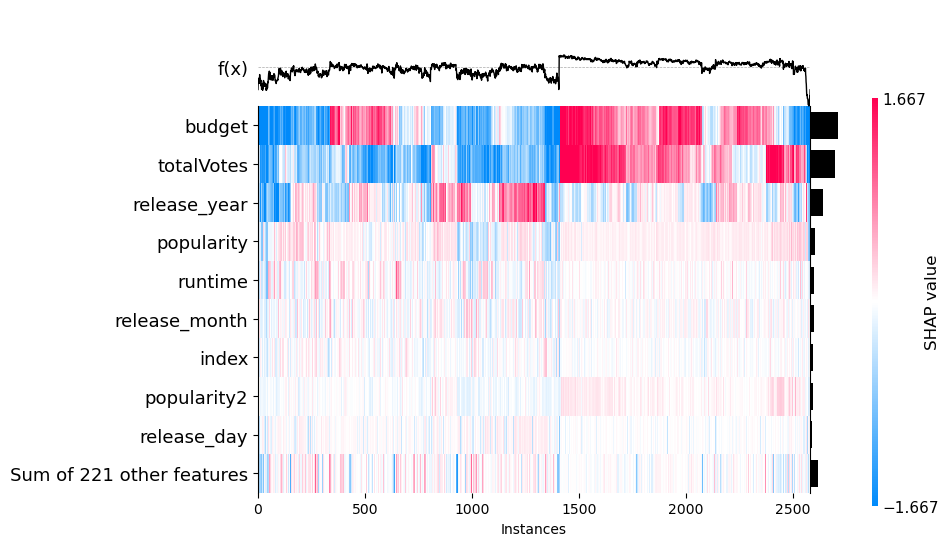

In [38]:
shap.plots.heatmap(shap_values)

 99%|===================| 2561/2582 [01:46<00:00]        

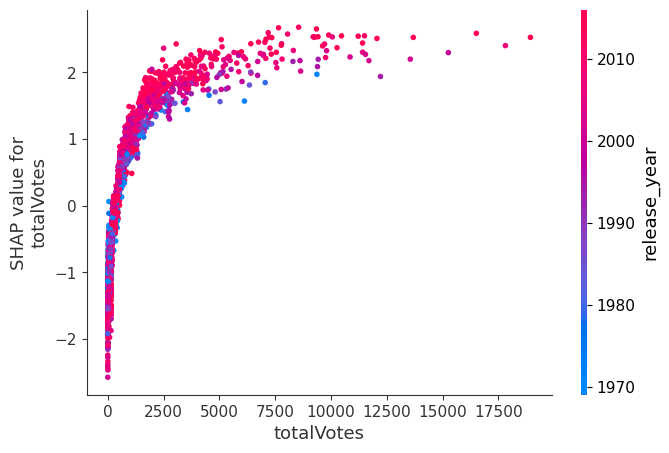

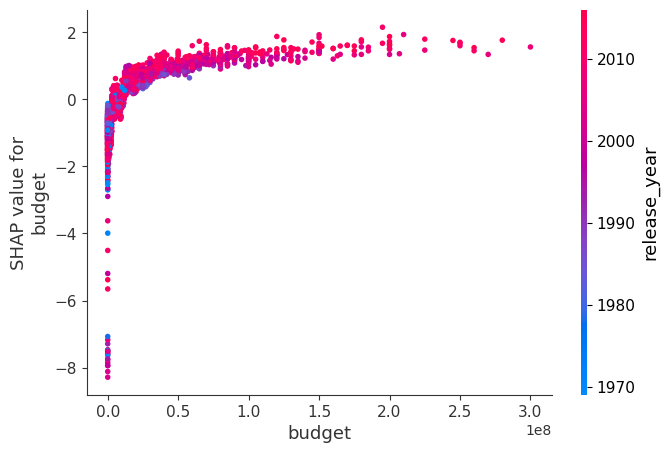

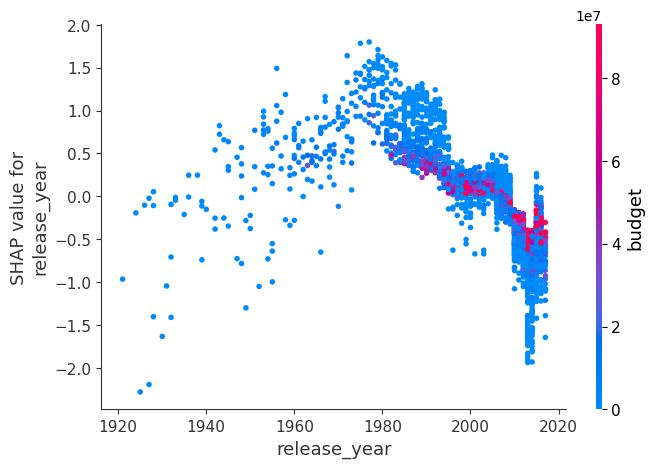

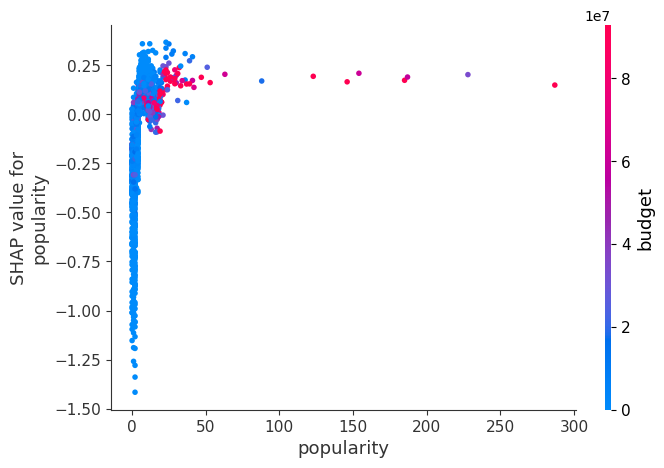

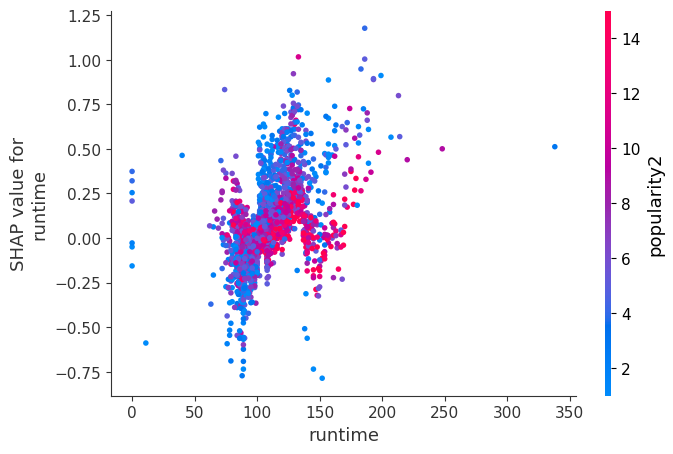

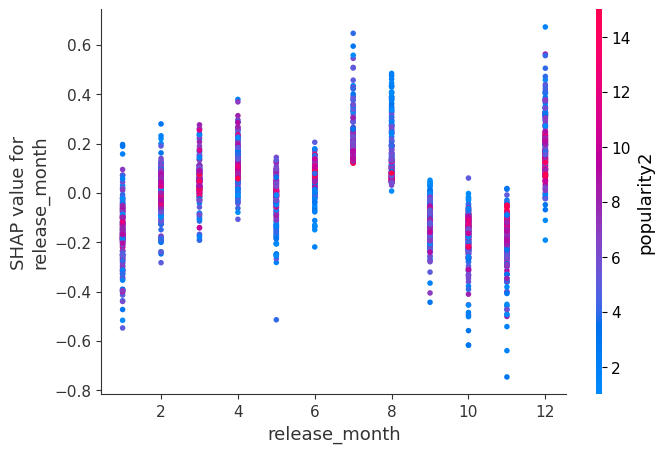

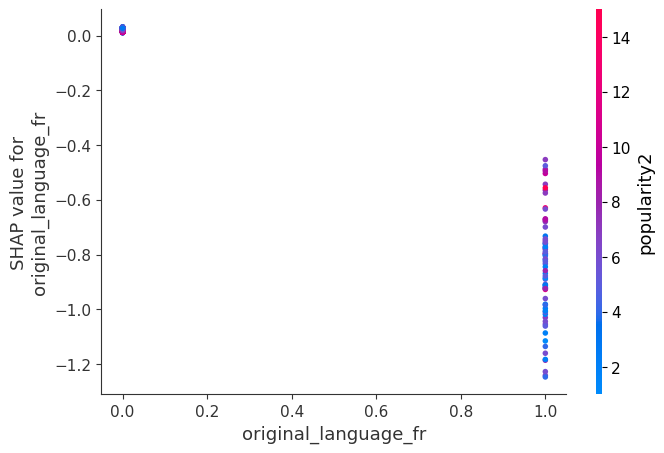

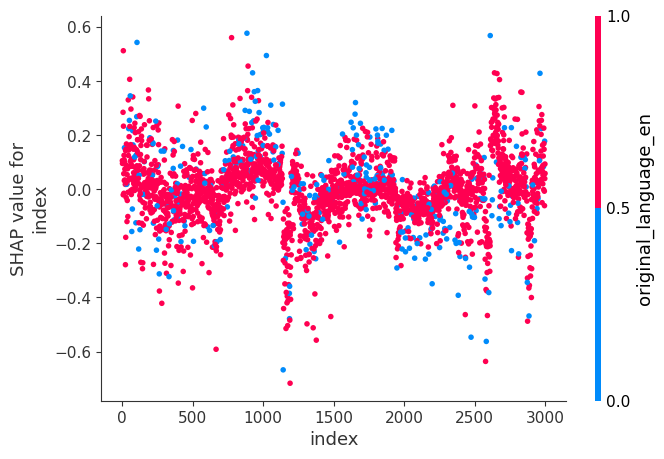

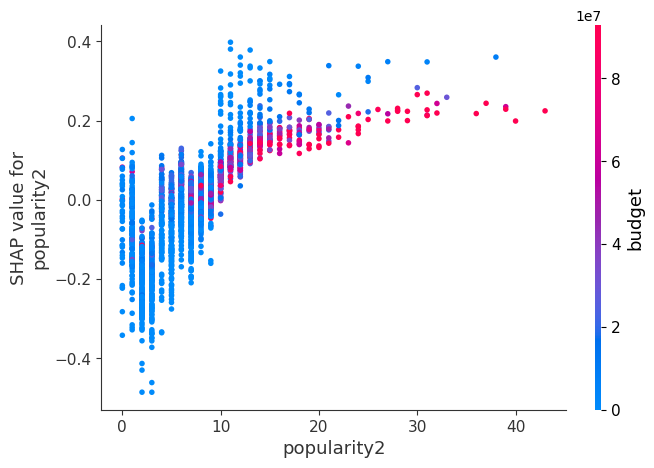

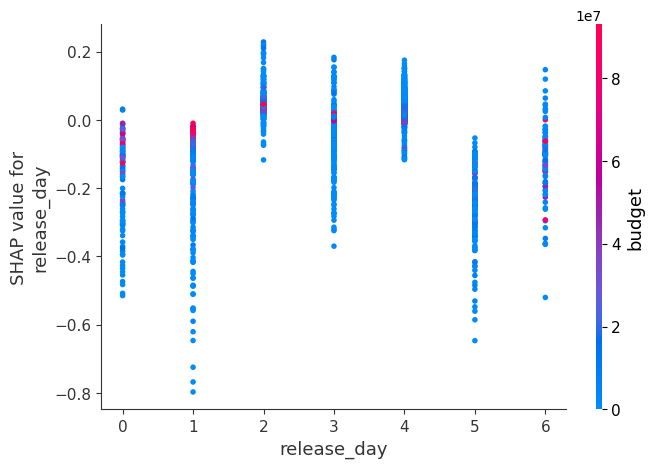

In [39]:
explainer = shap.TreeExplainer(model1, X_train)
shap_values2 = explainer.shap_values(X_train)
top_cols = X_train.columns[np.argsort(shap_values2.std(0))[::-1]][:10]
for col in top_cols:
    shap.dependence_plot(col, shap_values2, X_train)

## Summary

*Our group project analyzed the IMDB dataset and do the feature engineering basing on the existing columns. Besides, by implemengting the Xgboost, LightGBM and CatBoost algorithms, we could get the predicted outcome basing on the training data with relatively low RMSE. In the last part, we attemped to interpret the lightGBM model with the help of SHAP measurement.* 